In [98]:
from sklearn.datasets import load_iris
import skfuzzy as fuzz
import numpy as np
import matplotlib.pyplot as plt

data = load_iris()
X = data.data
X = np.hstack((X,300*np.random.rand(len(X),1)))
Y = data.target

In [99]:
cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
        X.T, 3, 60, error=0.0001, maxiter=100000, init=None)

In [100]:
l = [[0]*3 for i in range(3)]
for i in range(len(Y)):
    l[Y[i]][np.argmax(u[:,i])]+=1

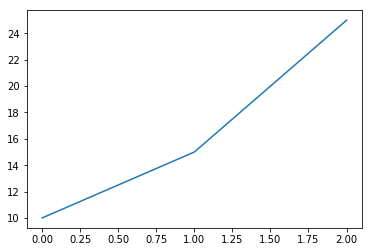

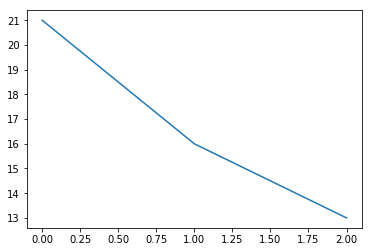

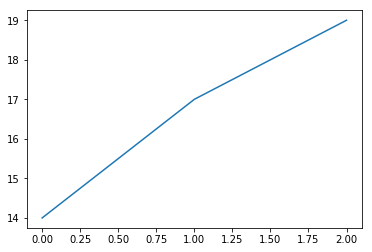

In [101]:
for i in range(3):
    plt.plot(l[i])
    plt.show()

# Creating the CF Matrix

In [102]:
clu = 1
CF = np.zeros((X.shape[1],X.shape[1]))
for i in range(X.shape[1]):
    for j in range(X.shape[1]):
        summ=0
        for d in range(X.shape[0]):
            if np.argmax(u[:,d]) == clu:
                summ+=X[d][i]*X[d][j]
        CF[i,j]=summ

# Normalization

In [103]:
NCF = np.zeros((X.shape[1],X.shape[1]))
for i in range(X.shape[1]):
    for j in range(X.shape[1]):
        NCF[i,j]=CF[i,j]/(CF[i,j]+CF[j,j]-CF[i,j])

# Centroid

In [104]:
SC = np.zeros((X.shape[1],1))
for i in range(X.shape[1]):
    SC[i] = np.sum(NCF[i,:])

In [105]:
print(SC)

[[   7.97599077]
 [   3.91457313]
 [   5.81508477]
 [   1.94664937]
 [ 331.59618465]]
